<a href="https://colab.research.google.com/github/Priscilla-Harumi/Modelo-de-regressao-linear-para-marketing/blob/main/Modelo%20de%20regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Construindo um modelo de regressão para marketing**

**Etapa 01 Análise Descritiva**

**Contexto  -** Para ampliar sua base de clientes e impulsionar as vendas, uma empresa de marketing  investe mensalmente em publicidade online, utilizando plataformas como YouTube, Facebook e Newspaper para captar leads e impulsionar as vendas. Para garantir a eficiência desses investimentos, registramos os custos e analisamos os retornos, permitindo a otimização contínua das campanhas.
A empresa espera que o especialista em dados analise os fatores que influenciam a geração de leads e desenvolva um modelo preditivo para estimar o retorno de vendas com base nos investimentos em publicidade.

In [ ]:
import pandas as pd

In [ ]:
'''Importando a base de dados e visualizando o DataFrame para entender sua estrutura e conteúdo.
Temos 4 colunas com dados núméricos de vendas e investimento em publicidade.'''

mkt = pd.read_csv("MKT.csv", sep = ",")
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
'''Verificando se a base de dados tem valores nulos e como estão classificados os dados usando o comando info.
A base não possui valores nulos e seus dados estão classificado como números decimais. '''
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#São quatro colunas e 171 linhas
print(mkt.shape)

(171, 4)


In [ ]:
#Gerando estatísticas descritivas resumidas do DataFrame, usando o comando describe.
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Os dados representam investimentos em publicidade em três plataformas — YouTube, Facebook e newspaper — e suas respectivas vendas (sales).

Quantidade de registros: 171 linhas.
Média: O investimento médio foi de 178,02 no YouTube, 27,67 no Facebook e 35,24 em jornais, resultando em uma média de 16,92 vendas.
Desvio padrão (std): O YouTube tem a maior variação nos investimentos 102,45, enquanto newspaper e Facebook apresentam menor dispersão (24,90 e 17,91, respectivamente).
Mínimos e máximos: O investimento mínimo foi próximo de zero em todas as plataformas, enquanto os valores máximos foram 355,68 no YouTube, 59,52 no Facebook e 121,08 em jornais. As vendas variaram entre 1,92 e 32,4.
Quartis: 50% dos dados estão distribuídos entre 91,08 e 262,98 (YouTube), 11,7 e 43,68 (Facebook), 13,74 e 50,88 (jornais) e 12,54 a 20,82 (vendas), indicando uma maior concentração dos investimentos e das vendas dentro desses intervalos.

In [ ]:
#Identificando Outliers
# Criando o dataframe com os dados fornecidos
data = {
    "youtube": [178.021053, 102.449597, 0.84, 91.08, 179.76, 262.98, 355.68],
    "facebook": [27.671579, 17.913532, 0.0, 11.7, 26.76, 43.68, 59.52],
    "newspaper": [35.240000, 24.902918, 0.36, 13.74, 31.08, 50.88, 121.08],
    "sales": [16.922807, 6.314608, 1.92, 12.54, 15.48, 20.82, 32.4]
}

columns = ["mean", "std", "min", "25%", "50%", "75%", "max"]
df = pd.DataFrame(data, index=columns)

# Calculando o intervalo interquartil (IQR) para cada variável
iqr = df.loc["75%"] - df.loc["25%"]

# Limites inferior e superior para identificar outliers
lower_bound = df.loc["25%"] - 1.5 * iqr
upper_bound = df.loc["75%"] + 1.5 * iqr

# Mostrando os limites
print("Limites Inferiores:\n", lower_bound)
print("Limites Superiores:\n", upper_bound)

# Identificando outliers com base nos limites
outliers = {}
for column in df.columns:
    outliers[column] = {
        "lower_outliers": df.loc["min", column] < lower_bound[column],
        "upper_outliers": df.loc["max", column] > upper_bound[column]
    }

# Exibindo os outliers identificados
print("\nOutliers Identificados:")
for variable, values in outliers.items():
    print(f"{variable}: {values}")


Limites Inferiores:
 youtube     -166.77
facebook     -36.27
newspaper    -41.97
sales          0.12
dtype: float64
Limites Superiores:
 youtube      520.83
facebook      91.65
newspaper    106.59
sales         33.24
dtype: float64

Outliers Identificados:
youtube: {'lower_outliers': False, 'upper_outliers': False}
facebook: {'lower_outliers': False, 'upper_outliers': False}
newspaper: {'lower_outliers': False, 'upper_outliers': True}
sales: {'lower_outliers': False, 'upper_outliers': False}


Na análise foi identificado um outlier que poderia influenciar o modelo resultando em uma previsão menos precisa. Optou-se por remove-lo.

In [ ]:
#Remoção do outlier
df = df[df["newspaper"] <= 106.59]


**Etapa 02 Análise Exploratória**

In [ ]:
%pip install plotly #Importando Plotly: Para criar gráficos interativos.
%pip install cufflinks #Importando Cufflinks: Para simplificar a criação de gráficos a partir de DataFrames pandas.
%pip install chart_studio #Chart Studio: Para publicar e compartilhar gráficos na nuvem.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
#Importanto outras bibliotecas necessárias para visualizações de gráficos e operações matemáticas
import seaborn as sns
import numpy as np
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go

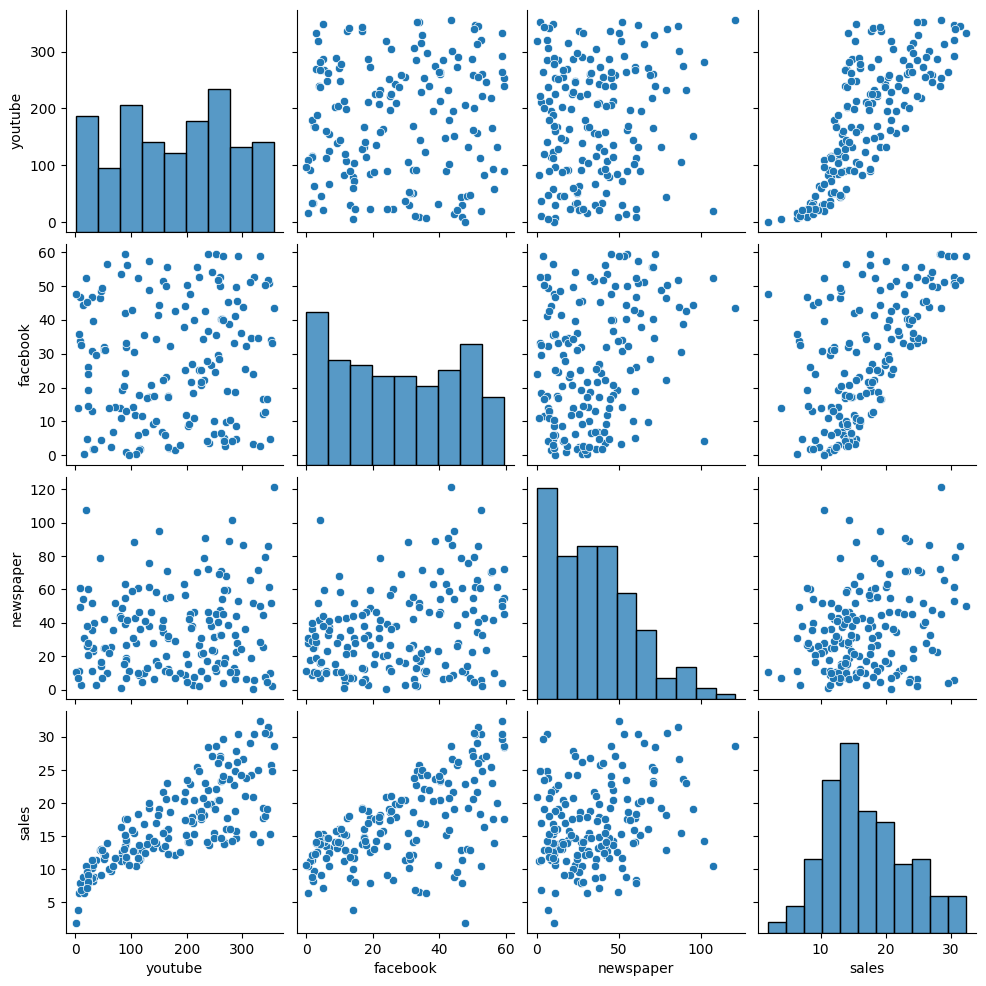

In [ ]:
'''A correlação entre todas as colunas do dataset revela que um maior investimento em anúncios no YouTube
tende a resultar em mais vendas. Além disso, observa-se que um aumento nas vendas está associado a um maior
volume de anúncios publicados.
Também há uma relação entre o número de anúncios no Facebook e o crescimento das vendas.'''
sns.pairplot(mkt)

In [ ]:
#Comparação somente com o preço
mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

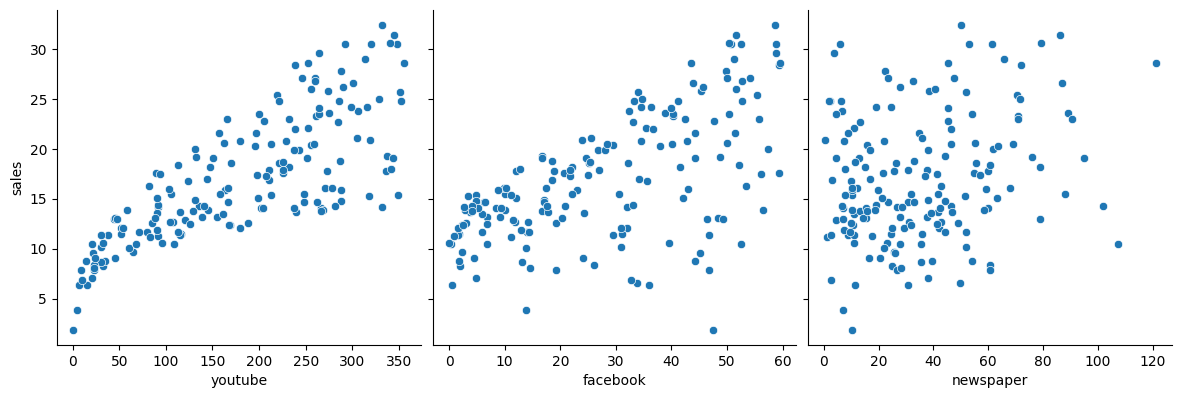

In [ ]:
'''Observando a relação de linearidade entre as variáveis X (os meios de comunicação) e a variável
y (quantidade de vendas) Newspaper apresenta o gráfico com mais dados dispersos (menor linearidade)'''
sns.pairplot(mkt, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')

In [ ]:
#Analisando a correlação entre os anúncios nos meios de comunicação e as vendas realizadas.
mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


Youtube é a variável mais relevante para prever Sales. O forte coeficiente de correlação (0.782) sugere que investir no Youtube está altamente associado ao aumento das vendas.
Facebook também é importante, mas menos que Youtube. A correlação moderada (0.602) indica que o investimento nessa plataforma tem impacto positivo nas vendas, mas não tão significativo quanto o Youtube.
Newspaper tem influência fraca. A correlação baixa (0.255) sugere que o investimento em Jornal tem pouco efeito sobre as vendas.
Se o objetivo for maximizar vendas, o foco principal deve estar no investimento em Youtube, seguido de Facebook, enquanto o impacto de Newspaper é mais limitado.

<Axes: >

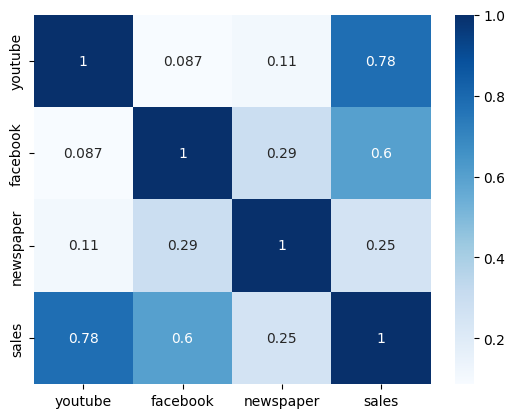

In [ ]:
sns.heatmap(mkt.corr(), cmap="Blues", annot=True)

<Axes: xlabel='sales', ylabel='Count'>

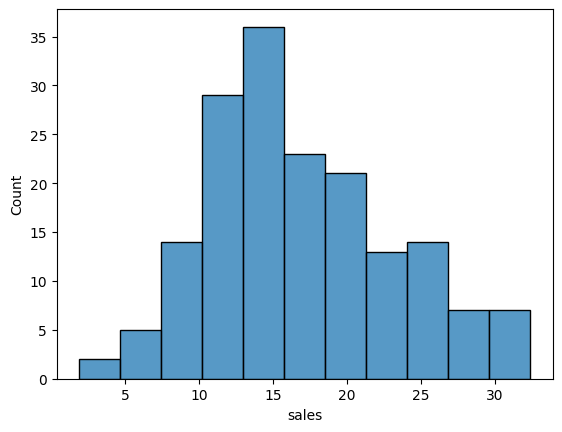

In [ ]:
#O histograma abaixo mostra como os valores de vendas estão distribuídos no conjunto de dados.
sns.histplot(mkt['sales'])

**Etapa 03 Modelagem**

Modelagem de dados / Separando as variáveis:
x contém as variáveis explicativas.
y contém a variável-alvo.

Objetivo: Prever as vendas com base nos investimentos em youtube, facebook e newspaper.
Aqui, x seria usado como entrada para um modelo de regressão e y seria o valor a ser previsto.

In [ ]:
X = mkt[['youtube', 'facebook', 'newspaper']] #Variáveis explicativas
Y = mkt[['sales']] #variável preditiva

In [ ]:
#Separando as bases de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
#Treinando o modelo
from sklearn.linear_model import LinearRegression


In [ ]:
#Treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Predizendo a base de teste
Y_pred = modelo.predict(X_test)

In [ ]:
#Resultado
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.882423505618885

O valor de 0.8824 indica que aproximadamente 88,24% da variabilidade nas vendas é explicada pelo modelo.
Conclusão: O modelo tem um bom ajuste aos dados, já que um valor de 𝑅2 superior a 0.80 é geralmente considerado ótimo para muitos tipos de modelos de regressão. Em outras palavras, a maior parte da variação nas vendas pode ser explicada pelas variáveis independentes usadas no modelo (como youtube, facebook, e newspaper).

**Etapa 04 Calculando predição**

In [ ]:
import matplotlib.pyplot as plt

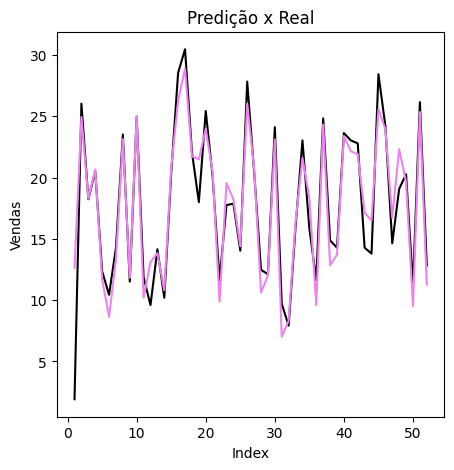

In [ ]:
#Resultado atual da base
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(5, 5))
plt.plot(c, Y_test, color = "black")
plt.plot(c, Y_pred, color = "violet")
plt.xlabel("Index")
plt.ylabel("Vendas")
plt.title("Predição x Real")
plt.show()

As linhas do gráfico acima estão próximas, indicando que o modelo está fazendo previsões precisas e que os valores reais e previstos são bastante semelhantes.

In [ ]:
# De acordo com os dados de investimento em Youtube, Facebook e Newspaper (respectivamente):
novos_dados = np.array([[500, 0, 50],   # Predição 1
                        [50, 0, 500]])  # Predição 2

# Criando um DataFrame com os nomes das colunas
novos_dados_df = pd.DataFrame(novos_dados, columns=['youtube', 'facebook', 'newspaper'])

# Previsão usando o modelo
vendas_previstas = modelo.predict(novos_dados_df)

# Exibindo as previsões
print(vendas_previstas)



[[26.26854574]
 [ 5.85910703]]


Conclusão: De acordo com o resultado obtido, a comparação entre um alto investimento no YouTube e um baixo investimento em Newspaper sugere que as vendas tendem a ser altas, com projeções mais positivas. Por outro lado, quando há um alto investimento em Newspaper e um baixo investimento no YouTube, as vendas apresentam uma queda drástica, com uma redução de 77,7% nas vendas comparando a primeira projeção com a segunda. Nos testes o Facebook se mostra positivo, porém não tão positivo quanto o Youtube.